In [57]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


#split the dataset into training and test set
from sklearn.model_selection import train_test_split

#import 

#import train_set.csv
dataset = pd.read_csv('train_set.tsv', sep='\t')
#the x are all the columns except the last one

# Regression

In [58]:

x = dataset.iloc[:, :-2].values
#for regression, it's the last column
y = dataset.iloc[:, -1].values


#feature scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
x = sc.fit_transform(x)


#split the dataset into training and test set for regression and classification
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

#print the shape
print("x_train shape: ", x_train.shape)
print("y_train shape: ", y_train.shape)
print("####################")
print("x_test shape: ", x_test.shape)
print("y_test shape: ", y_test.shape)





x_train shape:  (800, 35)
y_train shape:  (800,)
####################
x_test shape:  (200, 35)
y_test shape:  (200,)


Mean squared error: 134378472.74
Regression score score: -0.04


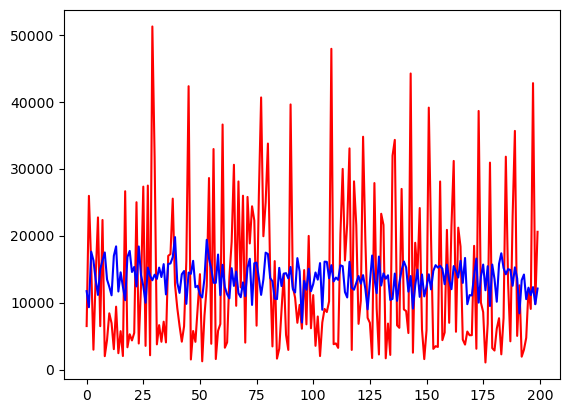

In [59]:
#use a linear regression model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

#predict the test set results
y_pred = regressor.predict(x_test)

plt.plot(y_test, color = 'red', label = 'Real')
plt.plot(y_pred, color = 'blue', label = 'Predicted')

#calculate the mean squared error and the regression score
from sklearn.metrics import mean_squared_error, r2_score
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
print('Regression score score: %.2f' % r2_score(y_test, y_pred))






mean_absolute_percentage_error:  1.5844728302672337
r2_score:  0.03255991064274144


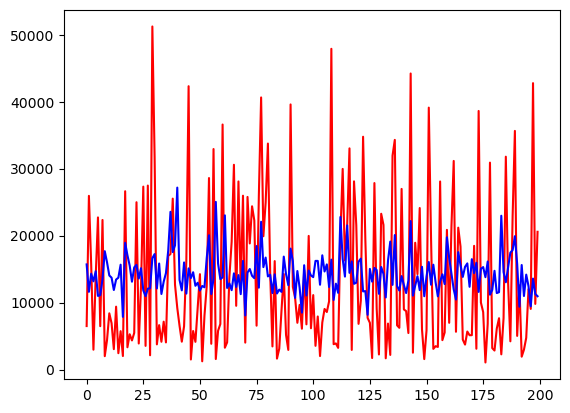

In [60]:
#import random forest regressor
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 250, random_state = 0)
regressor.fit(x_train, y_train)

#predict the test set results
y_pred = regressor.predict(x_test)

plt.plot(y_test, color = 'red', label = 'Real')
plt.plot(y_pred, color = 'blue', label = 'Predicted')

#compute the accuracy with mape
from sklearn.metrics import mean_absolute_percentage_error
print("mean_absolute_percentage_error: ", mean_absolute_percentage_error(y_test, y_pred))

#compute the accuracy with r2
from sklearn.metrics import r2_score
print("r2_score: ", r2_score(y_test, y_pred))






# Classification

In [61]:
x = dataset.iloc[:, :-2].values
y = dataset.iloc[:, -2].values




#minmax normalization
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
x = sc.fit_transform(x)

#use SMOTE
# from imblearn.over_sampling import SMOTE
# sm = SMOTE(random_state=42, k_neighbors=2)
# x, y = sm.fit_resample(x, y)



#split the dataset into training and test set for regression and classification
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

#uso SMOTE per bilanciare il dataset
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42, k_neighbors=2)
x_train, y_train = sm.fit_resample(x_train, y_train)




#print the shape
print("x_train shape: ", x_train.shape)
print("y_train shape: ", y_train.shape)
print("####################")
print("x_test shape: ", x_test.shape)
print("y_test shape: ", y_test.shape)




x_train shape:  (2220, 35)
y_train shape:  (2220,)
####################
x_test shape:  (200, 35)
y_test shape:  (200,)


accuracy_score:  0.395


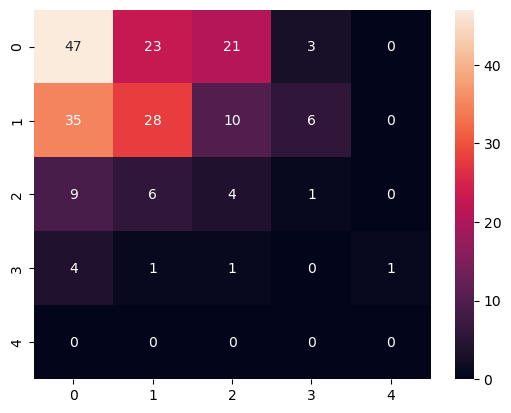

In [62]:
#q: what are the machine learning methods for classification?
#a: logistic regression, support vector machine, decision tree classification, random forest classification

#use a decision tree classifier for classification
from sklearn.tree import DecisionTreeClassifier

decisionTree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
decisionTree.fit(x_train, y_train)

#predict the test set results
y_pred = decisionTree.predict(x_test)

#compute the accuracy with confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

from seaborn import heatmap
heatmap(cm, annot=True)

#compute the accuracy with accuracy score
from sklearn.metrics import accuracy_score
print("accuracy_score: ", accuracy_score(y_test, y_pred))




In [63]:
#import an SVM classifier
from sklearn.svm import SVC
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

for type in ['rbf', 'poly', 'sigmoid', 'linear']:
    for degree in range(2, 5):
        for gamma in [0.01, 0.05, 0.1, 0.2 ,0.5, 0.8, 1, 10]:
            
                svm = SVC(kernel = type, random_state = 0, degree=degree, gamma=gamma)
                svm.fit(x_train, y_train)

                #predict the test set results
                y_pred = svm.predict(x_test)


                #compute the accuracy 
                accuracy = accuracy_score(y_test, y_pred)
                if accuracy > 0.48:
                    print("Type: ", type, " degree: ", degree, " gamma: ", gamma)
                    print("accuracy_score: ", accuracy)
                    #print f1 score
                    
                    print("f1_score: ", f1_score(y_test, y_pred, average='macro'))
                    
            


Type:  rbf  degree:  2  gamma:  0.8
accuracy_score:  0.505
f1_score:  0.2315900315900316
Type:  rbf  degree:  2  gamma:  1
accuracy_score:  0.495
f1_score:  0.21397119861406866
Type:  rbf  degree:  3  gamma:  0.8
accuracy_score:  0.505
f1_score:  0.2315900315900316
Type:  rbf  degree:  3  gamma:  1
accuracy_score:  0.495
f1_score:  0.21397119861406866
Type:  rbf  degree:  4  gamma:  0.8
accuracy_score:  0.505
f1_score:  0.2315900315900316
Type:  rbf  degree:  4  gamma:  1
accuracy_score:  0.495
f1_score:  0.21397119861406866


In [ ]:
#use random forest classifier
from sklearn.ensemble import RandomForestClassifier

for n_estimators in range(10, 100, 10):
    randomForest = RandomForestClassifier(n_estimators = n_estimators, criterion = 'entropy', random_state = 0)
    randomForest.fit(x_train, y_train)

    #predict the test set results
    y_pred = randomForest.predict(x_test)

    #compute the accuracy with accuracy score
    from sklearn.metrics import accuracy_score
    accuracy = accuracy_score(y_test, y_pred)
    
    print("n_estimators: ", n_estimators)
    print("accuracy_score: ", accuracy)


n_estimators:  10
accuracy_score:  0.445
n_estimators:  20
accuracy_score:  0.435
n_estimators:  30
accuracy_score:  0.465
n_estimators:  40
accuracy_score:  0.435
n_estimators:  50
accuracy_score:  0.46
n_estimators:  60
accuracy_score:  0.47
n_estimators:  70
accuracy_score:  0.465
n_estimators:  80
accuracy_score:  0.47
n_estimators:  90
accuracy_score:  0.455


In [ ]:
#use KNN
from sklearn.neighbors import KNeighborsClassifier

for n_neighbors in range(1, 10):
    for weights in ['uniform', 'distance']:
        for algorithm in ['auto', 'ball_tree', 'kd_tree', 'brute']:
            for leaf_size in range(10, 100, 10):
                for p in range(1, 5):
                    knn = KNeighborsClassifier(n_neighbors = n_neighbors, weights=weights, algorithm=algorithm, leaf_size=leaf_size, p=p)
                    knn.fit(x_train, y_train)

                    #predict the test set results
                    y_pred = knn.predict(x_test)

                    #compute the accuracy with accuracy score
                    from sklearn.metrics import accuracy_score
                    accuracy = accuracy_score(y_test, y_pred)
                    
                    #if accuracy > 0.48:
                    print("n_neighbors: ", n_neighbors, " weights: ", weights, " algorithm: ", algorithm, " leaf_size: ", leaf_size, " p: ", p)
                    print("accuracy_score: ", accuracy)
                    #print f1 score
                    
                    print("f1_score: ", f1_score(y_test, y_pred, average='macro'))

n_neighbors:  1  weights:  uniform  algorithm:  auto  leaf_size:  10  p:  1
accuracy_score:  0.36
f1_score:  0.20073509916560525
n_neighbors:  1  weights:  uniform  algorithm:  auto  leaf_size:  10  p:  2
accuracy_score:  0.355
f1_score:  0.19362962962962962
n_neighbors:  1  weights:  uniform  algorithm:  auto  leaf_size:  10  p:  3
accuracy_score:  0.325
f1_score:  0.17859772340646657
n_neighbors:  1  weights:  uniform  algorithm:  auto  leaf_size:  10  p:  4
accuracy_score:  0.3
f1_score:  0.16873739427967613
n_neighbors:  1  weights:  uniform  algorithm:  auto  leaf_size:  20  p:  1
accuracy_score:  0.36
f1_score:  0.20073509916560525
n_neighbors:  1  weights:  uniform  algorithm:  auto  leaf_size:  20  p:  2
accuracy_score:  0.355
f1_score:  0.19362962962962962
n_neighbors:  1  weights:  uniform  algorithm:  auto  leaf_size:  20  p:  3
accuracy_score:  0.325
f1_score:  0.17859772340646657
n_neighbors:  1  weights:  uniform  algorithm:  auto  leaf_size:  20  p:  4
accuracy_score:  0